In [370]:
import networkx as nx

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [371]:
g = nx.read_gml("lesmiserables.gml")
print(g.edges(data=True))

[('Myriel', 'Napoleon', {'value': 1}), ('Myriel', 'MlleBaptistine', {'value': 8}), ('Myriel', 'MmeMagloire', {'value': 10}), ('Myriel', 'CountessDeLo', {'value': 1}), ('Myriel', 'Geborand', {'value': 1}), ('Myriel', 'Champtercier', {'value': 1}), ('Myriel', 'Cravatte', {'value': 1}), ('Myriel', 'Count', {'value': 2}), ('Myriel', 'OldMan', {'value': 1}), ('Myriel', 'Valjean', {'value': 5}), ('MlleBaptistine', 'MmeMagloire', {'value': 6}), ('MlleBaptistine', 'Valjean', {'value': 3}), ('MmeMagloire', 'Valjean', {'value': 3}), ('Labarre', 'Valjean', {'value': 1}), ('Valjean', 'Marguerite', {'value': 1}), ('Valjean', 'MmeDeR', {'value': 1}), ('Valjean', 'Isabeau', {'value': 1}), ('Valjean', 'Gervais', {'value': 1}), ('Valjean', 'Fantine', {'value': 9}), ('Valjean', 'MmeThenardier', {'value': 7}), ('Valjean', 'Thenardier', {'value': 12}), ('Valjean', 'Cosette', {'value': 31}), ('Valjean', 'Javert', {'value': 17}), ('Valjean', 'Fauchelevent', {'value': 8}), ('Valjean', 'Bamatabois', {'value':

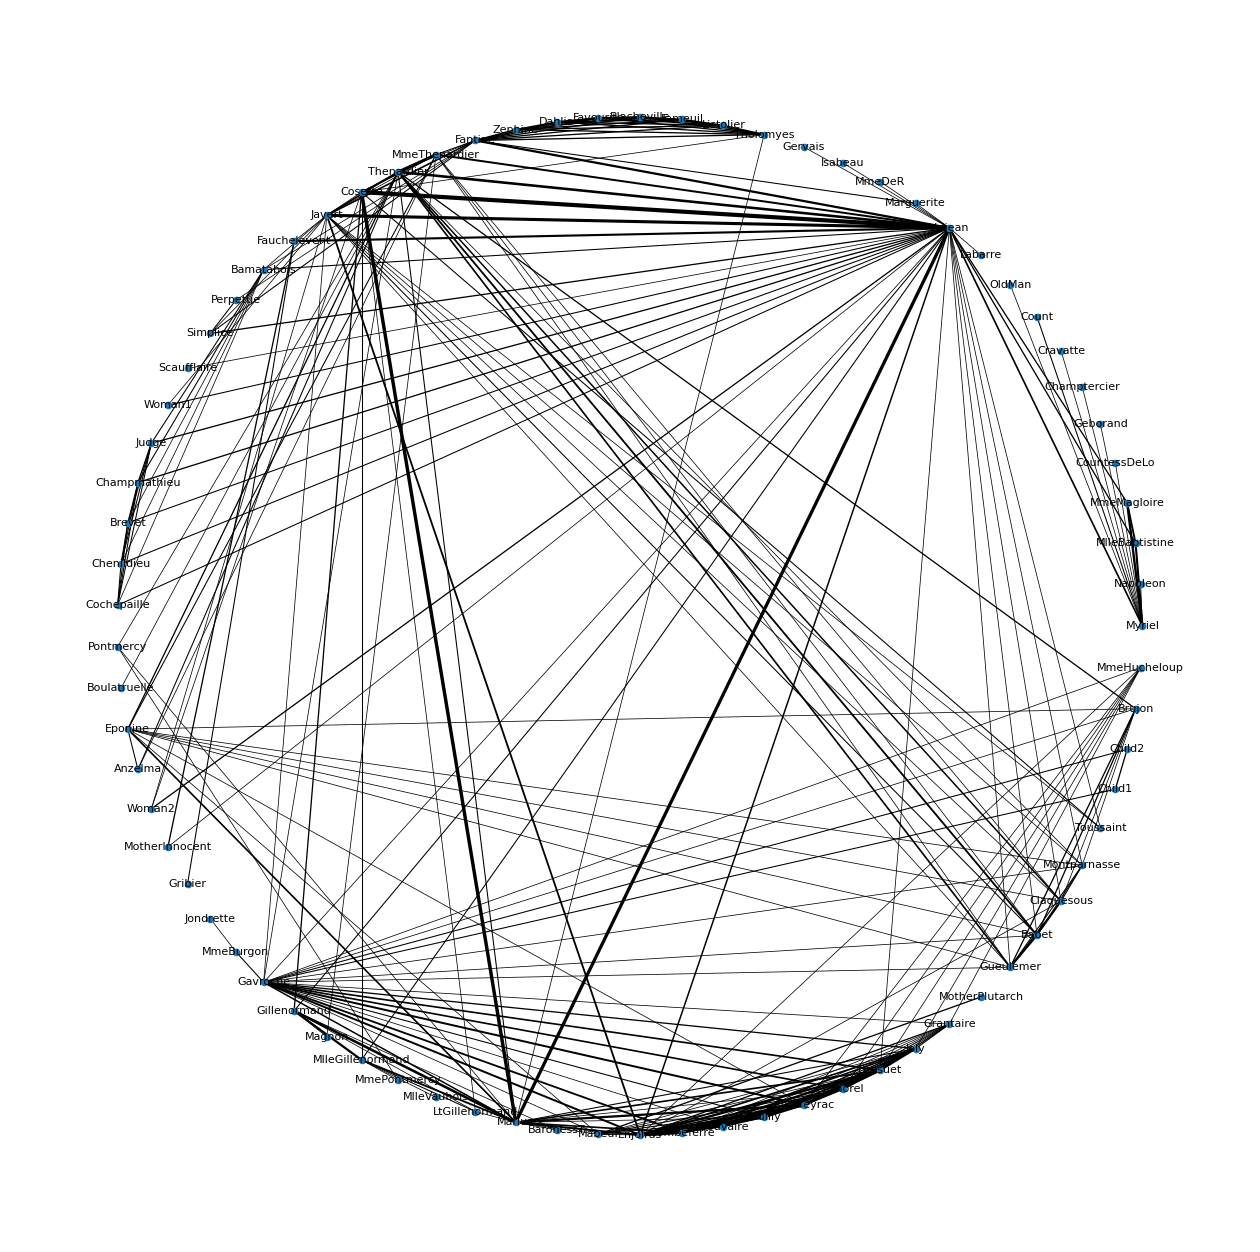

In [372]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16), dpi = 100)
nx.draw_circular(g, with_labels=True, node_size = 20, width=np.sqrt(weights / max_weight)*3, font_size=8)


In [373]:
weights = np.array([e[2]["value"] for e in g.edges(data=True)])
max_weight = np.max(weights)
node_degree = dict(g.degree(weight = "value"))
node_size = np.array([node_degree[n] for n in g.nodes()])
pos = nx.circular_layout(g)

l = np.array([e[2]["value"] for e in g.edges(data=True)])
print(max(l))
# max_key = max(node_degree, key = node_degree.get)
# print(node_degree.get(max_key))

31


In [374]:
n = len(list(g.nodes()))
angle = []
angle_dict = {}
for i, node in zip(range(n),g.nodes()):
    a = 2.0*np.pi*i/n
    angle.append((np.cos(a),np.sin(a)))
    angle_dict[node] = a

print(angle_dict)


{'Myriel': 0.0, 'Napoleon': 0.08159980918415047, 'MlleBaptistine': 0.16319961836830094, 'MmeMagloire': 0.2447994275524514, 'CountessDeLo': 0.32639923673660187, 'Geborand': 0.40799904592075237, 'Champtercier': 0.4895988551049028, 'Cravatte': 0.5711986642890533, 'Count': 0.6527984734732037, 'OldMan': 0.7343982826573542, 'Labarre': 0.8159980918415047, 'Valjean': 0.8975979010256551, 'Marguerite': 0.9791977102098056, 'MmeDeR': 1.0607975193939563, 'Isabeau': 1.1423973285781066, 'Gervais': 1.223997137762257, 'Tholomyes': 1.3055969469464075, 'Listolier': 1.387196756130558, 'Fameuil': 1.4687965653147084, 'Blacheville': 1.550396374498859, 'Favourite': 1.6319961836830095, 'Dahlia': 1.71359599286716, 'Zephine': 1.7951958020513101, 'Fantine': 1.8767956112354607, 'MmeThenardier': 1.9583954204196112, 'Thenardier': 2.039995229603762, 'Cosette': 2.1215950387879126, 'Javert': 2.2031948479720627, 'Fauchelevent': 2.284794657156213, 'Bamatabois': 2.3663944663403638, 'Perpetue': 2.447994275524514, 'Simplice

In [375]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16), dpi = 600)
#fig.set_size_inches(19.20, 19.20)
ax.set_title("Weighted network of co-appearances of characters in Victor Hugo's novel " + '"Les Miserables"', fontsize=16)
ax.axis('equal')

nx.draw_networkx_nodes(g, 
    pos=pos, 
    node_color="red", 
    node_size= node_size*4, 
    ax=ax
)

nx.draw_networkx_edges(
    g,
    pos=pos,
    width=np.sqrt(weights) / np.sqrt(max_weight)*4,
    edge_color="darkgray",
    alpha=0.6,
    ax=ax,
)

labels_pos = nx.draw_networkx_labels(g,pos, font_size= 8)
m = len(labels_pos.items())
counter = 0
for node, t in labels_pos.items():
    counter += 1
    bb = t.get_window_extent(renderer=fig.canvas.get_renderer())
    bbdata = bb.transformed(plt.gca().transData.inverted())
    c = 1.05 if (node == "Valjean" or node == "Marius" or node == "Enjolras") else 1.03
    r = c+bbdata.width/2 
    position = (r*np.cos(angle_dict[node]),r* np.sin(angle_dict[node]))
    t.set_position(position)
    if 1/8 *m < counter < 3/8 * m + 2 or 5/8 *m < counter < 7/8 * m +2 :
        t.set_rotation(angle_dict[node]*360.0/(2.0*np.pi))
    else:
        t.set_rotation(angle_dict[node])
    t.set_clip_on(False)

for w in [1, 5, 10, 20, 40]:
    ax.plot([], [], "darkgray", linewidth=np.sqrt(w) / np.sqrt(max_weight)*4, label=w)
ax.legend(title="Number of co-appearances", frameon=False, loc = "lower left", fontsize = 8)

plt.axis("off")
plt.show()

In [376]:
labels_pos.items()

#nx.draw(g, node_color = 'red')

dict_items([('Myriel', Text(1.062879122378241, 0.0, 'Myriel')), ('Napoleon', Text(1.0777324090680565, 0.08813847000662273, 'Napoleon')), ('MlleBaptistine', Text(1.0918854193983514, 0.17979434634383806, 'MlleBaptistine')), ('MmeMagloire', Text(1.0699895082017385, 0.2672936197327671, 'MmeMagloire')), ('CountessDeLo', Text(1.0490693263672293, 0.35511687978959855, 'CountessDeLo')), ('Geborand', Text(0.9944177823270615, 0.4298413879319496, 'Geborand')), ('Champtercier', Text(0.9739526564118424, 0.5189930593190886, 'Champtercier')), ('Cravatte', Text(0.9058779730452396, 0.5821724233525207, 'Cravatte')), ('Count', Text(0.8437401714363995, 0.645148681232905, 'Count')), ('OldMan', Text(0.7951041932441326, 0.717875443578032, 'OldMan')), ('Labarre', Text(0.73397288186361, 0.7803247491974343, 'Labarre')), ('Valjean', Text(0.6791930978564882, 0.8516812063262996, 'Valjean')), ('Marguerite', Text(0.6072954992543472, 0.9038838089770469, 'Marguerite')), ('MmeDeR', Text(0.5267687380906861, 0.94173952756